<a href="https://colab.research.google.com/github/artjow/-/blob/main/%EA%B8%B0%EC%82%AC_%EC%A0%9C%EB%AA%A9_%ED%81%AC%EB%A1%A4%EB%A7%81%EC%9D%84_%ED%86%B5%ED%95%9C_%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C_%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://durian9s-coding-tree.tistory.com/19

In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 10.1 MB/s 
     |████████████████████████████████| 448 kB 72.8 MB/s 
     |████████████████████████████████| 86 kB 6.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from wordcloud import WordCloud

In [3]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq  #코랩에서 한글 표기를 위해 폰트 설치(리눅스)

Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
date='20210324' 
#일자는 변경해 주면 되며, 코드 상 3월24일의 네이버 뉴스 랭킹의 기사제목을 뽑아온다.
news_url = 'https://news.naver.com/main/ranking/popularDay.nhn?date={}'.format(date)


headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
req = requests.get(news_url, headers = headers)
#  headers = headers 이것도 한참 애먹었었다. 왜 안되지? 라고 생각하면서 계속 구글링을 해보니 네이버에서 막은것이었다.
# 일명 안티 크롤링
soup = BeautifulSoup(req.text, 'html.parser')
news_titles = soup.select('.rankingnews_box > ul > li > div > a')

crowled_title = []
for i in range(len(news_titles)):
    crowled_title.append(news_titles[i].text)
    print(i+1, news_titles[i].text) # 기사 제목 리스트 저장하기

1 15살 고교생까지 죽어가는데···최고사령관 아들 리조트서 성대한 파티
2 애 낳은 적 없다던 구미 여아 친모, 스마트폰엔 '출산 준비' 검색
3 "양심선언해야" 文 대통령 백신 접종 간호사 향한 '협박' 논란
4 음란행위 하며 여성 괴롭힌 40대…문 닫고 버틴 버스기사가 잡아
5 '렉스턴 욕설 논란' 대구 식당에 쏟아진 별점 테러…일각선 "지나쳤다"
6 [단독]“LH직원들, 지방 정착용 특공아파트 113채 전매 차익”
7 윤석열 사퇴- LH분노 시너지, 여권 전례없는 위기 불렀나
8 “구미 3세여아 친모 진료기록 찾아라” 산부인과 170여곳 압수수색나선 경찰
9 민주당 “지금은 비상 상황”… 박원순 옹호하면서까지 지지층 결집
10 6억이하 아파트도 공시가 급등 후폭풍… 재산세 ‘반짝감면’ 뒤 껑충
11 [사건의 재구성]고시원 가장 죽어갈 때…2차살인 도구 사러 마트 간 '악마'
12 혼자 아이 낳았나…구미 3세아 친모, 회사PC로 '셀프출산' 검색
13 국민연금, 조원태 한진그룹 회장 재선임 '반대' 결정
14 서울시장, 여론조사와 다르다?…투표장, 누가 많이 가느냐 싸움
15 이준석 "김종인, 신성로마제국 황제의 리더십…윤석열 접촉1순위, 金"
16 문 대통령 '주사기 바꿔치기' 의혹?..."허위 조작 정보"
17 "조민 부산대 의전원 입학 취소 가능"...의사 면허도 취소될까?
18 집에 있던 7살 소녀에도 총격..."미성년자 최소 20명 사망"
19 구미 여아 친모, 3년 전 출산 앞두고 '셀프 출산' 검색
20 배로 가득했던 베네치아 운하서 돌고래 발견...'코로나의 역설?'
21 文 백신 주사기 뚜껑 어땠길래…화이자 바꿔치기 논란
22 [단독]의문의 알약 6개…동부구치소 '양반다리 사망' 미스터리
23 [더오래]친구 셋과 자전거 국토 종주 떠났다 혼자 돌아온 아들
24 [단독]러시아 알바생만 노렸다…새벽, 테슬라 타고 온 바바리맨
25 "내 인생 망칠까봐" 몰카 고소 취하한 정준영 前여친의 후회
26 [단독] 4년 전 건물 지어놓고…박형준 부인의 

In [5]:
title = "".join(crowled_title)

filtered_title = title.replace('.', ' ').replace('"',' ').replace(',',' ').replace("'"," ").replace('·', ' ').replace('=',' ').replace('\n',' ')

filtered_title

'15살 고교생까지 죽어가는데   최고사령관 아들 리조트서 성대한 파티애 낳은 적 없다던 구미 여아 친모  스마트폰엔  출산 준비  검색 양심선언해야  文 대통령 백신 접종 간호사 향한  협박  논란음란행위 하며 여성 괴롭힌 40대…문 닫고 버틴 버스기사가 잡아 렉스턴 욕설 논란  대구 식당에 쏟아진 별점 테러…일각선  지나쳤다 [단독]“LH직원들  지방 정착용 특공아파트 113채 전매 차익”윤석열 사퇴- LH분노 시너지  여권 전례없는 위기 불렀나“구미 3세여아 친모 진료기록 찾아라” 산부인과 170여곳 압수수색나선 경찰민주당 “지금은 비상 상황”… 박원순 옹호하면서까지 지지층 결집6억이하 아파트도 공시가 급등 후폭풍… 재산세 ‘반짝감면’ 뒤 껑충[사건의 재구성]고시원 가장 죽어갈 때…2차살인 도구 사러 마트 간  악마 혼자 아이 낳았나…구미 3세아 친모  회사PC로  셀프출산  검색국민연금  조원태 한진그룹 회장 재선임  반대  결정서울시장  여론조사와 다르다?…투표장  누가 많이 가느냐 싸움이준석  김종인  신성로마제국 황제의 리더십…윤석열 접촉1순위  金 문 대통령  주사기 바꿔치기  의혹?    허위 조작 정보  조민 부산대 의전원 입학 취소 가능    의사 면허도 취소될까?집에 있던 7살 소녀에도 총격    미성년자 최소 20명 사망 구미 여아 친모  3년 전 출산 앞두고  셀프 출산  검색배로 가득했던 베네치아 운하서 돌고래 발견    코로나의 역설? 文 백신 주사기 뚜껑 어땠길래…화이자 바꿔치기 논란[단독]의문의 알약 6개…동부구치소  양반다리 사망  미스터리[더오래]친구 셋과 자전거 국토 종주 떠났다 혼자 돌아온 아들[단독]러시아 알바생만 노렸다…새벽  테슬라 타고 온 바바리맨 내 인생 망칠까봐  몰카 고소 취하한 정준영 前여친의 후회[단독] 4년 전 건물 지어놓고…박형준 부인의  수상한  미등기리얼미터  서울시장 후보 지지도  오세훈 48 9% 박영선 29 2%  소방차 앞길 막지 마세요…이제는 밀어버립니다 [이슈톡] 임신 27주 여성 묻지마

In [6]:
tw = Twitter() # Twitter가 Okt로 변경되었다고 코랩이가 말해줬다.



tokens_ko = tw.nouns(filtered_title)

tokens_ko

ko = nltk.Text(tokens_ko, name='기사 내 명사')

ko.tokens

ko.vocab()

new_ko=[]
for word in ko:
  if len(word) > 1 and word != '단독' and  word != ' ':
        new_ko.append(word)

new_ko

ko = nltk.Text(new_ko, name = '기사 내 명사 두 번째')

ko.tokens

ko.vocab()

data = ko.vocab().most_common(150)

data = dict(data)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


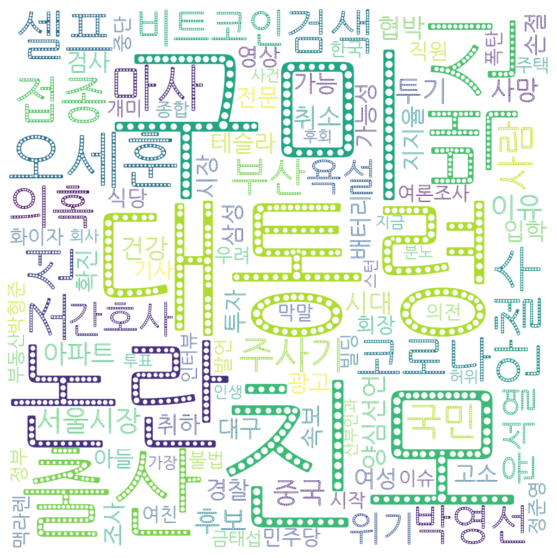

In [7]:
wordcloud = WordCloud().generate(filtered_title)

font = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

wc = WordCloud(font_path=font,\
		background_color="white", \
		width=1000, \
		height=1000, \
		max_words=100, \
		max_font_size=300)
wc = wc.generate_from_frequencies(data)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()